<a href="https://colab.research.google.com/github/PengJuan-AI/TensorFlow_Study/blob/main/02_neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write nn for classification problems.
* Binary
* Muticlass
* Multilabel

## Create data to view and fit

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000
X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [ ]:
# Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# Check out the features
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little hard to understand right now, let's visualize it.

In [ ]:
import pandas as pd

circles = pd.DataFrame({"X0": X[:,0], "X1":X[:,1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


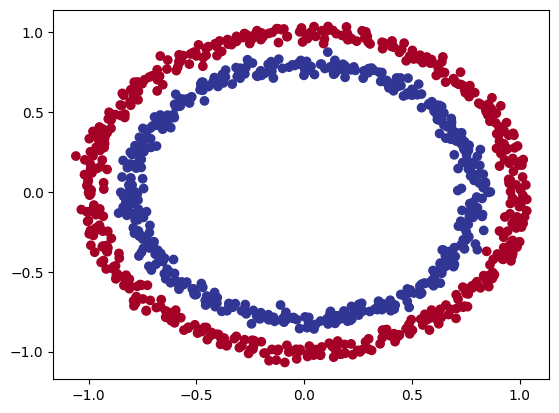

In [ ]:
# Visualize with a plot
import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.RdYlBu)

## Input and output shapes

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# View the first sample of features and labels
X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modeling

1. Create or import a model
2. Compile the model
3. fit the model
4. Evaluate the model
5. Tweak
6. Evaluate again...

In [ ]:
import tensorflow as tf

In [ ]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

model_1.fit(X,y, epochs=5)
# the accuracy is bascally guessing - close to 50%

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 4.5682 - accuracy: 0.4800
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 1.1174 - accuracy: 0.4880
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7185 - accuracy: 0.4880
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7017 - accuracy: 0.4940
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6967 - accuracy: 0.4910


In [ ]:
# Let's try and improve our model by training it longer..
model_1.fit(X,y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 1s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we're working on a binary classification problem, the model is getting around 50% accuracy. Let's step things up and add an extra layer.

In [ ]:
from scipy import optimize
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

model_2.fit(X,y, epochs=100, verbose=0)

In [ ]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 944us/step - loss: 0.6935 - accuracy: 0.5000


[0.6934722661972046, 0.5]

## Improving our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we might to add more layers or hidden units.
2. Compiling a model - we might choose a different optimizer.
3. Fitting a model - we might fit our model for more epochs. (training for longer)

In [ ]:
# Increase a hidden units
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_3.fit(X, y, epochs=100, verbose=0)

In [ ]:
model_3.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6988 - accuracy: 0.5060


[0.6988106369972229, 0.5059999823570251]

To visualize our model's predictions, create a function `plot_decision_boundary`

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different C values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones.

In [13]:
import numpy as np

def plot_decision_boundary(model, X, y):
  '''
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks
  '''
  # Define the axis boundaries of the plot and create a meshgrodid.
  x_min, x_max = X[:,0].min()-0.1, X[:,0].max()+0.1
  y_min, y_max = X[:,1].min()-0.1, X[:,1].max()+0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       (np.linspace(y_min, y_max, 100)))

  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D array together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0])>1:
    print("doing multiclass classification.")
    #reshape predictions to get them ready for plotting.
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification.")
    y_pred = np.round(y_pred).reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

In [14]:
# check out the predictions the model make
plot_decision_boundary(model_3,X=X,y=y)

NameError: ignored

In [ ]:
x_min, x_max = X[:,0].min()-0.1, X[:,0].max()+0.1
y_min, y_max = X[:,1].min()-0.1, X[:,1].max()+0.1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                      (np.linspace(y_min, y_max, 100)))

# Create X value (we're going to make predictions on these)
x_in = np.c_[xx.ravel(), yy.ravel()]

In [ ]:
# LET'S SEE OUR MODEL CAN BE USE FOR A REGRESSION MODEL

tf.random.set_seed(42)

# tf.range(start, end, step)
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)

# Split our regression data into training and testing data sets
# train_test_split cannot be used for tensor
# from sklearn.model_selection import train_test_split
# X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_regression, y_regression, test_size=0.25)
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the regression data
model_3.fit(X_reg_train, y_reg_train, epochs=100, verbose=0)


we compiled our model for a binary classification problem. But now we are working on a regression model. We should change our model to fit the data.

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    # tf.keras.layers.Input((None, 1)),
    tf.keras.layers.Dense(100, input_shape=(None, 1)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

# model_3.fit(X_reg_train, y_reg_train, epochs=100, verbose=0)
# New version of tensorflow does not expand dimension automatically
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train, epochs=100, verbose=0)

In [ ]:
# Make predictions
y_reg_pred = model_3.predict(tf.expand_dims(X_reg_test, axis=-1))

plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c='b')
plt.scatter(X_reg_test, y_reg_test, c='g')
plt.scatter(X_reg_test, y_reg_pred, c='r')

## The Non_linearity

In [ ]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    # tf.keras.layers.Input((None, 1)),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

model_4.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

# model_3.fit(X_reg_train, y_reg_train, epochs=100, verbose=0)
# New version of tensorflow does not expand dimension automatically
history = model_4.fit(X, y, epochs=100, verbose=0)

In [ ]:
# Check decision boundary
plot_decision_boundary(model=model_4, X=X, y=y)

Let's try build our first network with a non-linear avtivation function

In [ ]:
tf.random.set_seed(42)

# Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='relu')
])

model_5.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

history = model_5.fit(X, y, epochs=100)

Now we try combining adding layers with changing activation function.

And.. It gets almost 100% accuracy!

In [ ]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_6.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=['accuracy'])

history = model_6.fit(X, y, epochs=100)

In [ ]:
model_6.evaluate(X,y)

In [ ]:
# how do our model predictions look like
plot_decision_boundary(model=model_6, X=X, y=y)

Try and add activation function for output layer

In [15]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_7.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

history = model_7.fit(X, y, epochs=300, verbose=0)

In [16]:
model_7.evaluate(X,y)

16/16 [==============================] - 0s 2ms/step - loss: 5.5664e-04 - accuracy: 1.0000


[0.0005566402105614543, 1.0]

313/313 [==============================] - 1s 2ms/step
doing binary classification.


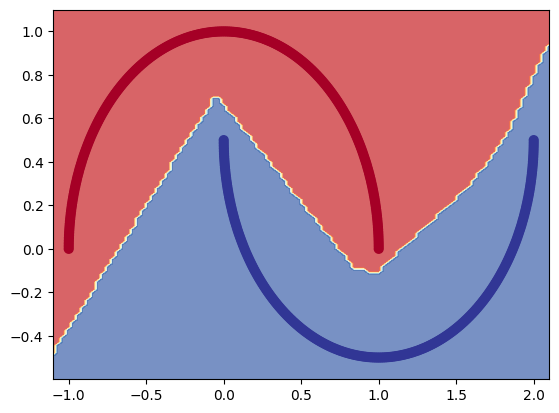

In [17]:
plot_decision_boundary(model_7, X=X, y=y)

❓**Question:** What's wrong with the predictions we've made? Are we really evaluating our model correctly?

📣**Answer:** No, we predict the data that we used for training. Hence, our model has already seen this data so of course the model can predict the data perfectly.

🔑**Note:** The combination of **linear (straight line) and non-linear (non-straight lines) functions** is one of the key fundamentals of neural networks.

In [18]:
# Create a toy a tensor
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

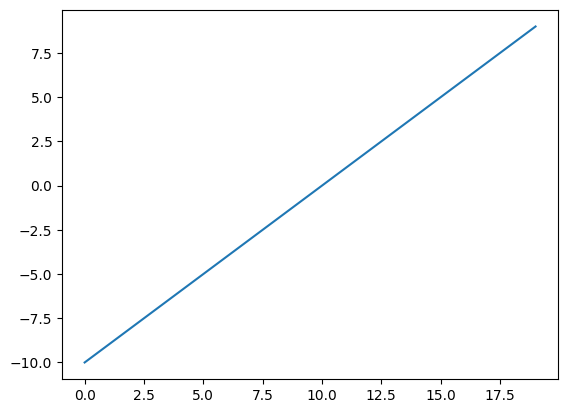

In [19]:
# Visualize our test tensor
plt.plot(A)

In [20]:
# Let's start by repliocating sigmoid
def sigmoid(x):
  return 1 / (1+tf.math.exp(-x))

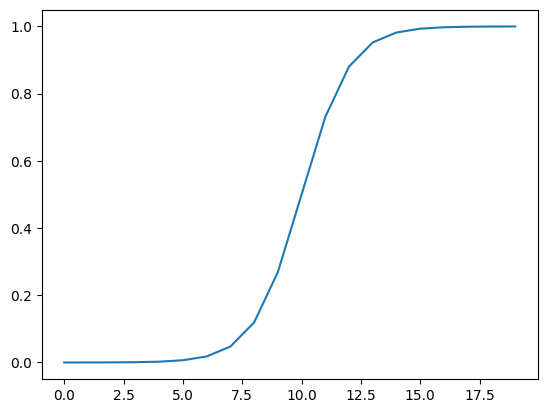

In [21]:
# Use the signoid function and plot it
plt.plot(sigmoid(A))

Let's replicate **relu** functions

In [22]:
def relu(x):
  return tf.maximum(0, x)

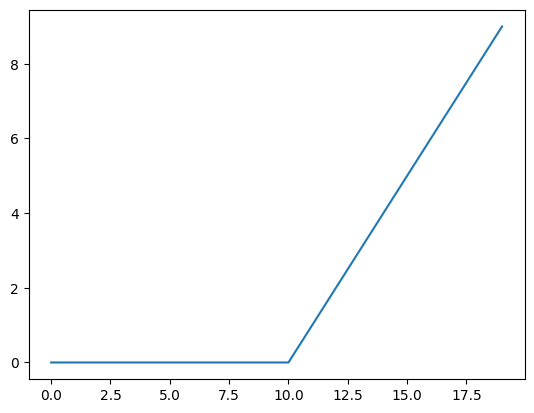

In [23]:
# Check our results of using relu function
# relu(A)
plt.plot(relu(A))

In [24]:
# Let's try linear activation functions
def linear(x):
  return x

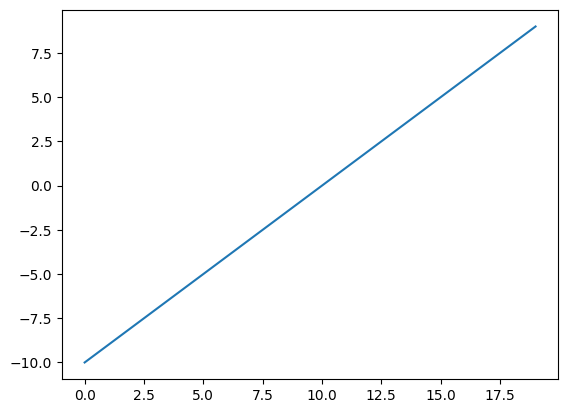

In [25]:
# Check out the linear function
# linear(A)
plt.plot(linear(A))

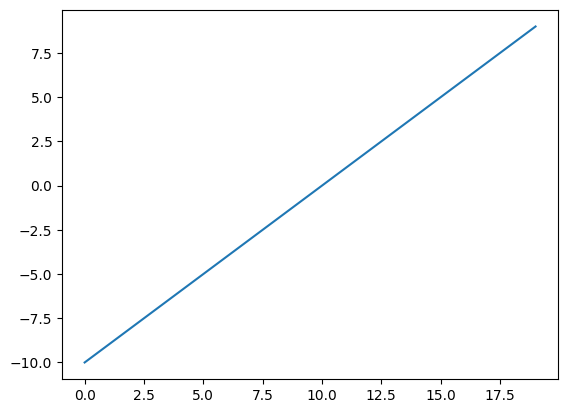

In [26]:
plt.plot(A)

## Evaluating and improving our model

So far we've been traing an testing on the sam dataset.

So let's create a training and test set

In [27]:
len(X)

500

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [29]:
len(X_train), len(X_test)

(375, 125)

In [30]:
# This time, we recreate a model to fit the training data and evluate on testing data.

tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
12/12 [==============================] - 1s 2ms/step - loss: 0.6466 - accuracy: 0.5947
Epoch 2/25
12/12 [==============================] - 0s 2ms/step - loss: 0.5797 - accuracy: 0.7813
Epoch 3/25
12/12 [==============================] - 0s 3ms/step - loss: 0.5084 - accuracy: 0.8053
Epoch 4/25
12/12 [==============================] - 0s 2ms/step - loss: 0.4506 - accuracy: 0.8133
Epoch 5/25
12/12 [==============================] - 0s 2ms/step - loss: 0.4054 - accuracy: 0.8347
Epoch 6/25
12/12 [==============================] - 0s 2ms/step - loss: 0.3639 - accuracy: 0.8480
Epoch 7/25
12/12 [==============================] - 0s 2ms/step - loss: 0.3327 - accuracy: 0.8613
Epoch 8/25
12/12 [==============================] - 0s 2ms/step - loss: 0.3050 - accuracy: 0.8693
Epoch 9/25
12/12 [==============================] - 0s 2ms/step - loss: 0.2833 - accuracy: 0.8853
Epoch 10/25
12/12 [==============================] - 0s 3ms/step - loss: 0.2620 - accuracy: 0.8933
Epoch 11/25
12/12 [

In [31]:
model_8.evaluate(X_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.0238 - accuracy: 1.0000


[0.02383085899055004, 1.0]

313/313 [==============================] - 0s 1ms/step
doing binary classification.
313/313 [==============================] - 0s 1ms/step
doing binary classification.


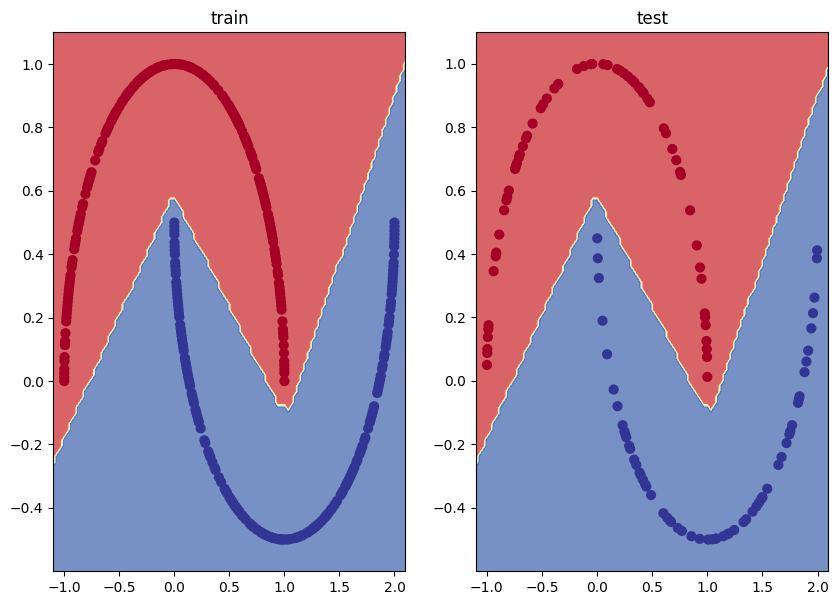

In [32]:
# Plot the decision boundary
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show();

IN practice, we create a model just as same as model_7 but we increase the learning rate to 0.01 (compared to 0.001). As a result, model_8 reach 70% accuracy just after 7 epochs and 96% after 25 epochs.

## Plot the loss (or traing) curves

In [33]:
# Convert the history object into a DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.646563,0.594667
1,0.579689,0.781333
2,0.508390,0.805333
3,0.450623,0.813333
4,0.405361,0.834667
5,0.363921,0.848000
6,0.332749,0.861333
7,0.305045,0.869333
8,0.283284,0.885333
9,0.261953,0.893333


Text(0.5, 1.0, 'Model_8 loss curves')

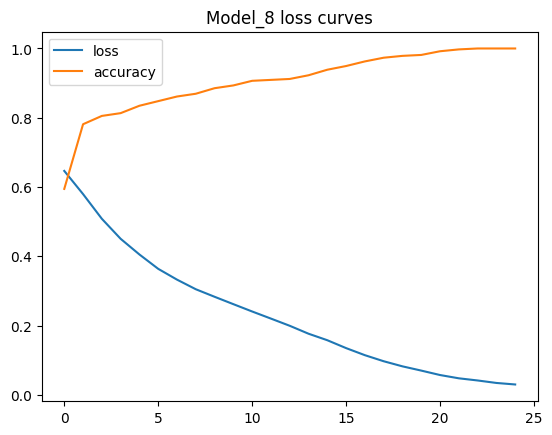

In [34]:
# Plot the loss curve
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves")

🔑**Note:** For many problems, the loss function going down means the model is improving.

## Finding the best learning rate

To find the ideal learing rate (the learning rate when loss decreases teh most during training) WE'RE going to use the following steps:
* A learning rate **callback** - you can think of it as an extra functionality, you can add to your model *while* it is training.
* Another modek (same one as above or building. anew one).
* A modified loss curves.

In [35]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_9.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

# Before we fit the model, we should create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-4 * 10**(epoch/20)
)
# Fit the model (passing lr_scheduler callback)
history = model_9.fit(X_train, y_train, epochs=100,
                      callbacks=[lr_scheduler])

Epoch 1/100
12/12 [==============================] - 1s 2ms/step - loss: 0.6641 - accuracy: 0.6560 - lr: 1.0000e-04
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 0.6629 - accuracy: 0.6587 - lr: 1.1220e-04
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 0.6616 - accuracy: 0.6640 - lr: 1.2589e-04
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 0.6601 - accuracy: 0.6667 - lr: 1.4125e-04
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 0.6585 - accuracy: 0.6747 - lr: 1.5849e-04
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 0.6567 - accuracy: 0.6800 - lr: 1.7783e-04
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 0.6546 - accuracy: 0.6853 - lr: 1.9953e-04
Epoch 8/100
12/12 [==============================] - 0s 2ms/step - loss: 0.6522 - accuracy: 0.6987 - lr: 2.2387e-04
Epoch 9/100
12/12 [==============================] - 0s 2ms/step - loss:

<Axes: xlabel='epochs'>

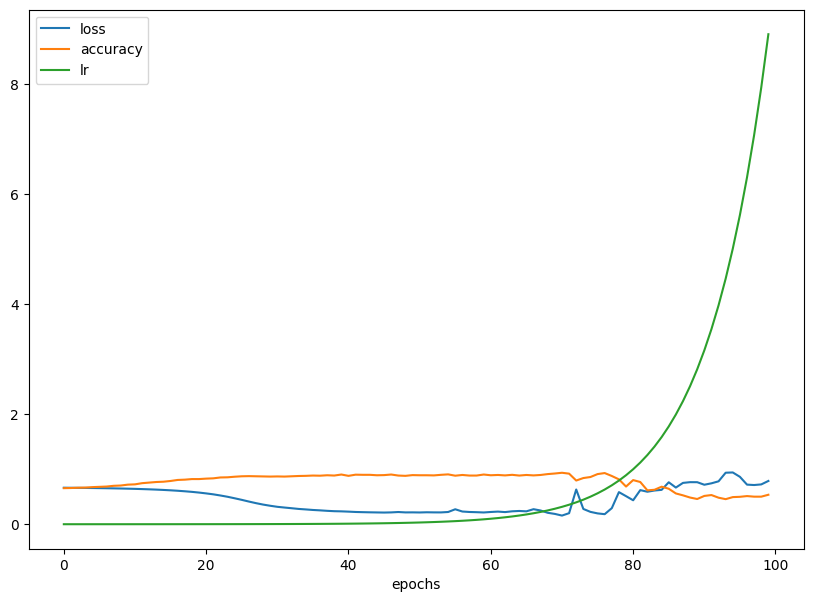

In [36]:
# Check out the historu
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel='epochs')

Text(0.5, 1.0, 'Learning rate vs. Loss')

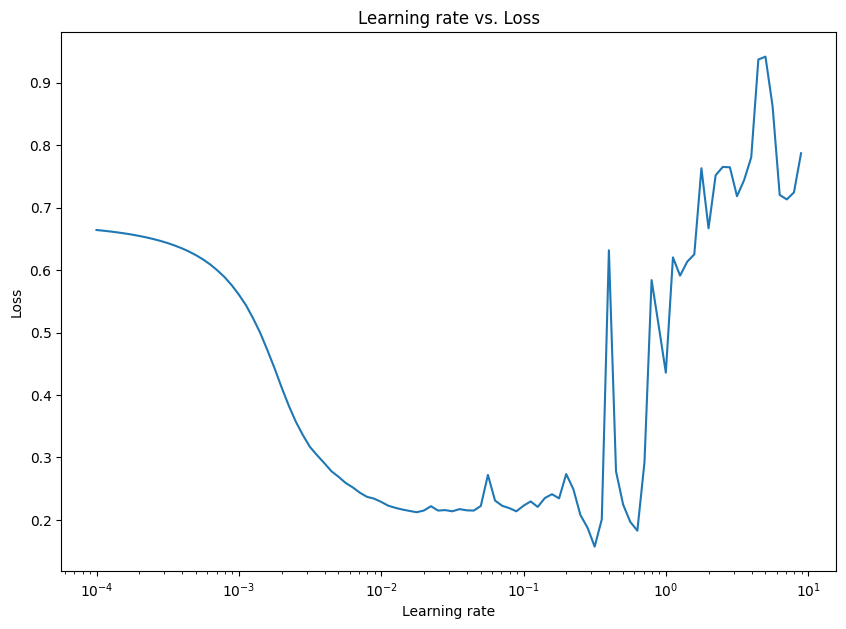

In [37]:
# plot the laering rate versus the loss
lrs = 1e-4 * (10**(tf.range(100)/20)) # 100 different lrs - replicate what happened in our training
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history.history['loss'])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. Loss")


In [38]:
# Example of other typical learning rates
10**0, 10**-1, 10**-2, 1e-4

(1, 0.1, 0.01, 0.0001)

The default learning rate for activation *Adam* is 0.001, sometimes the default lr is the best. But if it doesn't, you can alwasy try lr above. Or you can plot a learning rate vs. loss pic **(using learning rate scheduler)** to find out the best learning rate. (the lowest point)

In [39]:
# Let's try using a higher ideal learning rate with the same model as before
tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model with the ideal learning rate
model_10.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                metrics=['accuracy'])

# Fit the model (5 less than before)
history_10 = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
12/12 [==============================] - 1s 2ms/step - loss: 0.5354 - accuracy: 0.7253
Epoch 2/20
12/12 [==============================] - 0s 2ms/step - loss: 0.3792 - accuracy: 0.8480
Epoch 3/20
12/12 [==============================] - 0s 2ms/step - loss: 0.3151 - accuracy: 0.8667
Epoch 4/20
12/12 [==============================] - 0s 2ms/step - loss: 0.3002 - accuracy: 0.8693
Epoch 5/20
12/12 [==============================] - 0s 2ms/step - loss: 0.2875 - accuracy: 0.8747
Epoch 6/20
12/12 [==============================] - 0s 2ms/step - loss: 0.2787 - accuracy: 0.8747
Epoch 7/20
12/12 [==============================] - 0s 2ms/step - loss: 0.2781 - accuracy: 0.8667
Epoch 8/20
12/12 [==============================] - 0s 2ms/step - loss: 0.2693 - accuracy: 0.8880
Epoch 9/20
12/12 [==============================] - 0s 2ms/step - loss: 0.2692 - accuracy: 0.8773
Epoch 10/20
12/12 [==============================] - 0s 2ms/step - loss: 0.2683 - accuracy: 0.8853
Epoch 11/20
12/12 [

In [40]:
model_10.evaluate(X_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.2110 - accuracy: 0.9120


[0.21103502810001373, 0.9120000004768372]

With a more ideal learning rate increase the accuracy in a less epochs.

But learning faster does not mean it will perform well on test set.

In [41]:
model_8.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.0238 - accuracy: 1.0000


[0.02383085899055004, 1.0]

313/313 [==============================] - 0s 1ms/step
doing binary classification.
313/313 [==============================] - 0s 1ms/step
doing binary classification.


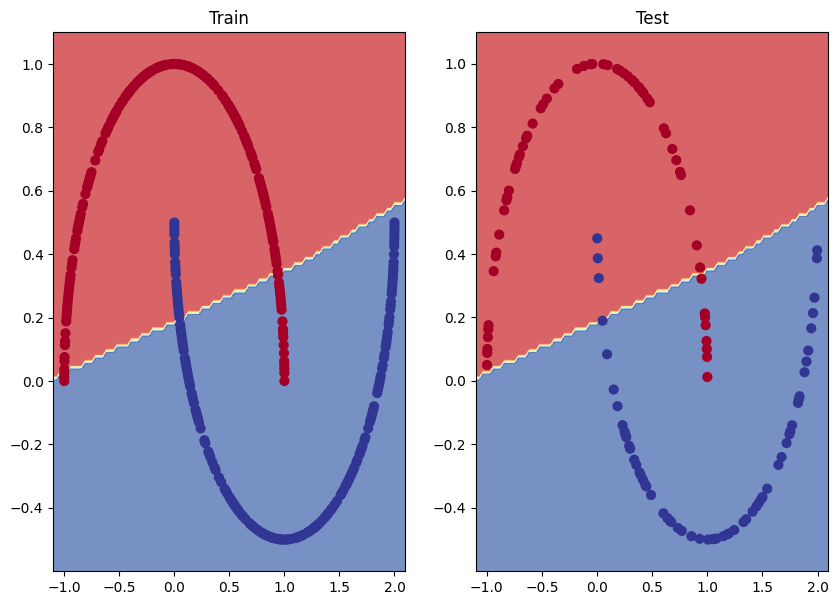

In [42]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)

## Classification evaluation methods

* Accuracy - Default one but not the best for imbalanced classes.
* **Precision** - Higher precision leads to less false positive.
* **Recall** - Higher recall leads to less false negative.
* F1-score - combination of precision and recall
* Confusion matrix
* Classidfication report(y_true, y_pred)

In [43]:
# Check the accuacy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
loss, accuracy

4/4 [==============================] - 0s 3ms/step - loss: 0.2110 - accuracy: 0.9120


(0.21103502810001373, 0.9120000004768372)

How about a confusion matrix?

In [44]:
from sklearn.metrics import confusion_matrix

In [45]:
y_pred = model_10.predict(X_test)
confusion_matrix(y_test, y_pred)

4/4 [==============================] - 0s 2ms/step


ValueError: ignored

In [ ]:
y_test[:10]

In [ ]:
y_pred[:10]

Looks like our predictions array come put in **prediction probability** form, the standard output from the sigmoid activation function.

In [ ]:
# Convert prediction probability to binary format and view the first 10
tf.round(y_pred)[:10]

In [ ]:
confusion_matrix(y_test, tf.round(y_pred))

How about we prettify confusion matrix

In [ ]:
# Note: the confusion matrix code is a remix of sklearn's plot_confusion_matrix
import itertools

figsize=(10,10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_pred))
cm_norm = cm.astype("float")/cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel='True label',
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)
# set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min())/2.

# Plot the test ob each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[0])):
   plt.text(j, i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
            horizontalalignment='center',
            color='white' if cm[i,j]>threshold else 'black', # Font color
            size=15)



In [ ]:
# cm_norm
# cm.astype("float")/cm.sum(axis=1)[:, np.newaxis]
cm.sum(axis=1), cm.sum(axis=1)[:, np.newaxis]

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
# plot_confusion_matrix(cm)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [79]:
def draw_confusion_matrix(y_test, y_pred, classes=None, figsize=(10,10)):
  # Note: the confusion matrix code is a remix of sklearn's plot_confusion_matrix
  import itertools

  # Create the confusion matrix
  cm = confusion_matrix(y_test, tf.round(y_pred))
  cm_norm = cm.astype("float")/cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted label",
        ylabel='True label',
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)
  # set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(20)
  ax.xaxis.label.set_size(20)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min())/2.

  # Plot the test ob each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[0])):
    plt.text(j, i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
              horizontalalignment='center',
              color='white' if cm[i,j]>threshold else 'black', # Font color
              size=10)



In [ ]:
draw_confusion_matrix(y_test, y_pred)

# Working with a larger example (multicalss classification)

When you have more than two classes as an option, it's known as **multi-class classification**.

### Problem
we're going to build a neural network to classify images of different clothes. (using fashion mnist - 10000 examples, 28*28 images, with a label from 10 classes).

In [65]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [66]:
# Show the first training exmaple.
train_data[0], train_labels[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
           0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
           1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
           0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
           0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
           0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
          10

In [67]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

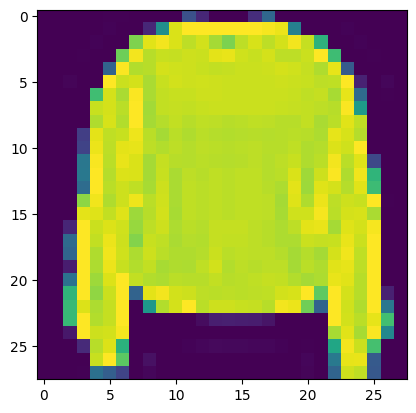

In [68]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7]);

In [ ]:
# Checkout samples labels
train_labels[7] # 2 is a pullover

In [69]:
# Create a small list so we can index ont our training labels so thet're human-readable
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)


10

Text(0.5, 1.0, 'T-shirt/top')

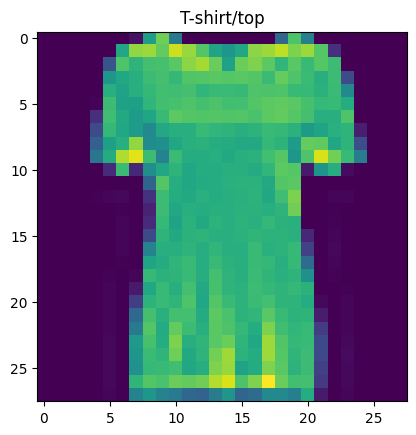

In [70]:
# Plot an example image and its label
index = 10
plt.imshow(train_data[index])
plt.title(class_names[train_labels[index]])

With a large data set with 100 labels, you should check many examples before your start building you model

After knowing better your data, you candecide what kind of neural network you're going to choose (linear/non-linear)

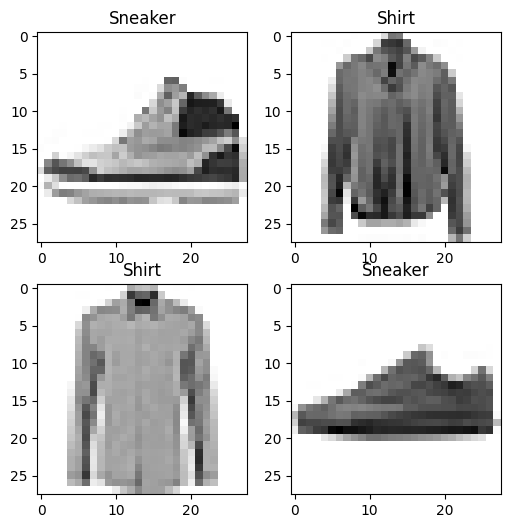

In [71]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(6,6))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])

## Building a multi-class classification moel

For pur multi-class classification model, we can use a similar architecture to our binary classifiers. But we need to tweak a few things:
(In this case)
* Input shape = 28 x 28
* Output shape = 10
* Loss function = tf.keras.losses.CategoricalCrossentropy()
* Output layer activation = Softmax

In [72]:
# Our data needs to be flatten (from 28*28 to 784), change into a one long vector
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_model.output_shape

(None, 784)

> Use this **crossentropy** loss function when there are two or more label classes. We expect labels to be provided in a **one_hot** representation.
❗️If you want to provide labels as integers, please use **SparseCategoricalCrossentropy** loss.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax') # tf.keras. activations.softmax
])

model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

non_norm_history = model_11.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))
# non_norm_history = model_11.fit(train_data, tf.one_hot(train_labels, depth=10), epochs=10,
#                                 validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

**Get data ready**
1. Turn all data into numbers
2. Make sure all of your tensors are the right shape
3. Scale features (standardize or normalize)
This means neural network like to have numbers in the tensor between 0 & 1

In [ ]:
# Check the model summary
model_11.summary()

In [73]:
# Check the min and max value of the training data
train_data.min(), train_data.max()

(0, 255)

In [74]:
# We can get our training and testing data between 0 & 1 by dividing by the maximum.
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check the min and max values of the scaled trainining data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [88]:
# build amodel to find patterns in new data (scaled)

tf.random.set_seed(42)

model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

norm_history = model_12.fit(train_data_norm, train_labels, epochs=10, validation_data=(test_data_norm, test_labels))



Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.4716 - accuracy: 0.3986 - val_loss: 1.1059 - val_accuracy: 0.5954
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9691 - accuracy: 0.6439 - val_loss: 0.8728 - val_accuracy: 0.6933
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7810 - accuracy: 0.7275 - val_loss: 0.7698 - val_accuracy: 0.7206
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.7276 - accuracy: 0.7406 - val_loss: 0.7287 - val_accuracy: 0.7370
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7022 - accuracy: 0.7476 - val_loss: 0.7313 - val_accuracy: 0.7346
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6821 - accuracy: 0.7552 - val_loss: 0.6987 - val_accuracy: 0.7492
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6668 - accuracy: 0.7629 - val_loss: 0.6965 - val_accuracy

> **Note:** Neural network tend to prefer data in numerical form as wellas scaled/normalized.

<Axes: title={'center': 'Normalized'}>

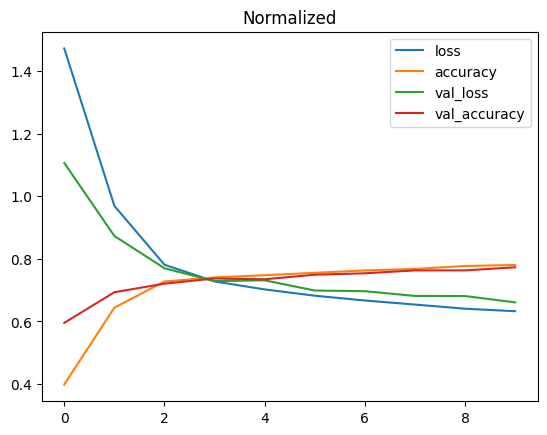

In [90]:
import pandas as pd
# Plot non-normalized data loss curves
# pd.DataFrame(non_norm_history.history).plot(title='Non-normalized')

pd.DataFrame(norm_history.history).plot(title='Normalized')

> 🔑 **Note:** When comparing the results, the same model with even *slightly* different data can produce *dramatically different results. Make sure you compare different models on the same criteria but different data or same data but different criteria.

## Finding the ideal learning rate

In [ ]:
tf.random.set_seed(42)

model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])
# Create the learning rate scheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3*10**(epoch/20))

find_lr_history = model_13.fit(train_data_norm, train_labels, epochs=40, callbacks=lr_scheduler,
             validation_data=(test_data_norm, test_labels))

In [ ]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3*(10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history['loss'])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")


In [75]:
# Let's refit a model with the ideal learning rate
tf.random.set_seed(42)

model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.002),
                 metrics=['accuracy'])

find_lr_history = model_14.fit(train_data_norm, train_labels, epochs=20,
             validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.6390 - accuracy: 0.2833 - val_loss: 1.4996 - val_accuracy: 0.3364
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3902 - accuracy: 0.3941 - val_loss: 1.3523 - val_accuracy: 0.4229
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 1.3226 - accuracy: 0.4318 - val_loss: 1.3296 - val_accuracy: 0.4294
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2894 - accuracy: 0.4689 - val_loss: 1.2857 - val_accuracy: 0.4752
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2553 - accuracy: 0.5053 - val_loss: 1.2702 - val_accuracy: 0.5059
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2321 - accuracy: 0.5232 - val_loss: 1.2474 - val_accuracy: 0.5235
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 1.2201 - accuracy: 0.5311 - val_loss: 1.2382 - val_accuracy:

## Evaluating our multi-class classification model

To evaluate:
* Evaluate its performance using other classification metrics
* Asses some of its predictions
* Improving its results (by training it longer or changing its architecture)
* Save and export it for use in an application

In [76]:
# Create a confusion metrics
y_pred = model_14.predict(test_data_norm)
# draw_confusion_matrix(test_labels, y_pred, classes=class_names)
y_pred[:10]

313/313 [==============================] - 0s 1ms/step


array([[6.86207682e-14, 1.73844683e-06, 2.73452580e-15, 9.81693635e-14,
        1.52481868e-13, 1.30532533e-01, 3.80547048e-13, 6.50391936e-01,
        1.62838333e-07, 2.19073638e-01],
       [2.55532637e-02, 1.51661870e-05, 2.42064998e-01, 3.65387168e-05,
        2.55778402e-01, 1.00369612e-03, 2.05201954e-01, 3.06696777e-04,
        2.70039290e-01, 1.05914863e-23],
       [5.72240073e-03, 7.99474835e-01, 3.59514670e-04, 3.74054983e-02,
        1.41531741e-03, 1.24647275e-01, 3.24087404e-03, 3.74318054e-03,
        2.39899401e-02, 1.04521155e-06],
       [1.72236585e-03, 6.52443409e-01, 1.04226150e-04, 9.93403513e-03,
        5.10444748e-04, 2.98921674e-01, 1.17716321e-03, 1.36769535e-02,
        2.15027146e-02, 6.85176110e-06],
       [2.99625665e-01, 2.51094066e-02, 1.01665772e-01, 2.39380404e-01,
        1.17924750e-01, 1.27579388e-03, 1.82875708e-01, 3.68539841e-05,
        3.21056359e-02, 2.09010421e-13],
       [8.65849014e-03, 8.15943658e-01, 5.52091107e-04, 5.94644845e-02,
   

> 🔑 **Note:** Remember to make predictions on the same kind of data your model was trained.

In [77]:
# Convert all of the prediction probabilities into integers
y_preds = y_pred.argmax(axis=1)
y_preds

array([7, 8, 1, ..., 0, 1, 5])

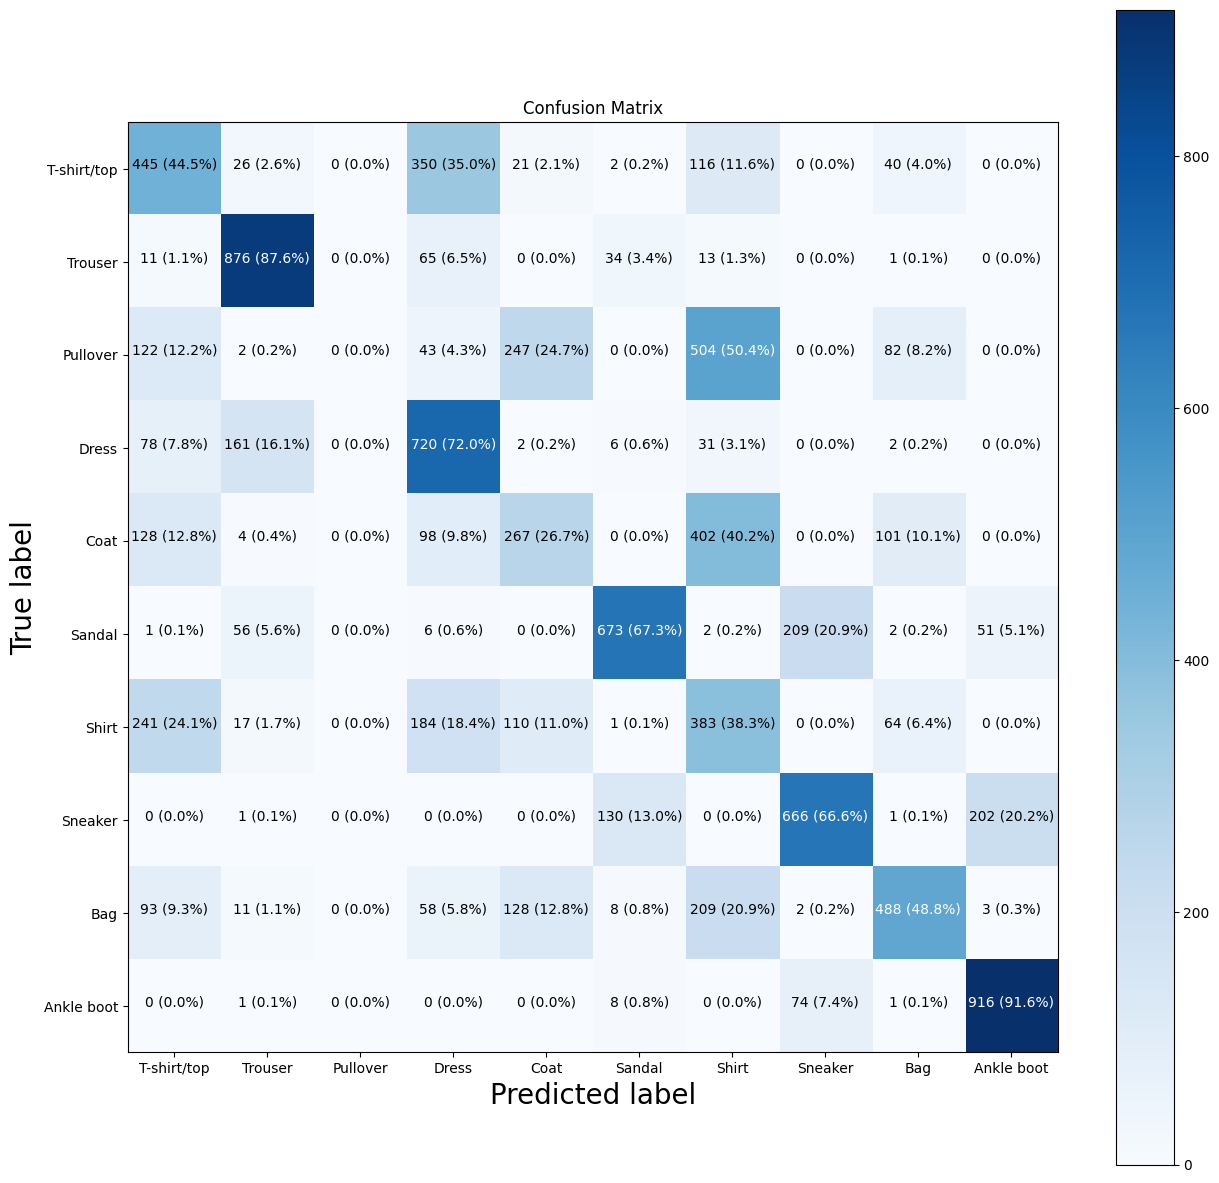

In [80]:
draw_confusion_matrix(test_labels, y_preds, classes=class_names, figsize=(15,15))

> **Note:** Often when working with images and other forms of visual data, it's a good idea to visualize as much as possible to develop a further understanding of the data and the inputs and outputs of your models.

Practice:
* Plot a random image
* Make a prediction on said image
* Label the plot with thr truth label & the predicted label

In [81]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and label it with a prediction and truth label
  """
  # Set up random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # we predict one image at a time
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred:{} {:2.0f}% (True:{})".format(pred_label, 100*tf.reduce_max(pred_probs),true_label),
             color=color)

In [ ]:
y_pred[0]

1/1 [==============================] - 0s 24ms/step


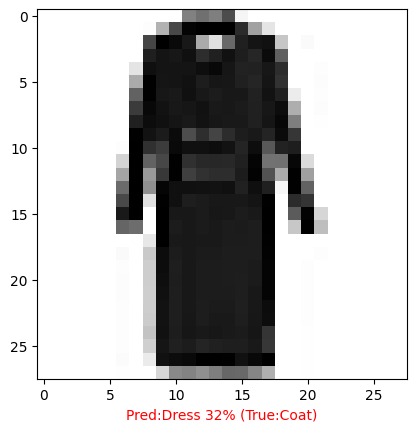

In [82]:
plot_random_image(model=model_14,
                  images=test_data_norm, # always make predictions on the same kind of data your model was trained on
                  true_labels=test_labels, classes=class_names)

## What patterns is our model learning?

In [83]:
# Find the layers of our most recent model
model_14.layers

In [84]:
# Extract a particular layer
model_14.layers[1]

Each value in the weights matrix reflects how a value in data set should influence the network decision.

1. At the begining, initialize the weights a random numbers.(kernel_initializer)
2. Show different examples
3. Slowly update representation outputs (weights & biases) - adjust weights and biases to fit the trained data
4. Repeat with more examples

In [ ]:
# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shapes
weights, weights.shape

Now let's check out the biases vector...

Weights have one value for each data point, while biases have one value for one hidden unit.

> Every neuron has a bias vector. Each of these is paired with a weights matrix. The bias matrix also gets initialized as zeros.

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

In [ ]:
biases, biases.shape

In [ ]:
model_14.summary()

In [ ]:
# Another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model

plot_model(model_14, show_shapes=True)

# Exercise

In [46]:
import tensorflow as tf

### Task 1

Create a neural network with input_shape=2, five layers and 6 hidden units in each layer. Activation is relu. Learning rate is 0.001.

Compile it using the Adam optimizer, binary crossentropy loss and accuracy metric. Once it's compiled check a summary of the model.

In [47]:
from keras.engine.training import optimizer
tf.random.set_seed(42)

model_15 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(None, 2)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_15.compile(loss=tf.keras.losses.binary_crossentropy,
           optimizer=tf.keras.optimizers.Adam(),
           metrics=['accuracy'])

In [48]:
# model_15.build()
model_15.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, None, 6)           18        
                                                                 
 dense_22 (Dense)            (None, None, 6)           42        
                                                                 
 dense_23 (Dense)            (None, None, 6)           42        
                                                                 
 dense_24 (Dense)            (None, None, 6)           42        
                                                                 
 dense_25 (Dense)            (None, None, 6)           42        
                                                                 
 dense_26 (Dense)            (None, None, 1)           7         
                                                                 
Total params: 193
Trainable params: 193
Non-trainable 

### Task 2

Create a classification dataset using Scikit-Learn's make_moons() function, visualize it and then build a model to fit it at over 85% accuracy

In [49]:
from sklearn.datasets import make_moons

X,y = make_moons(500, random_state=42)

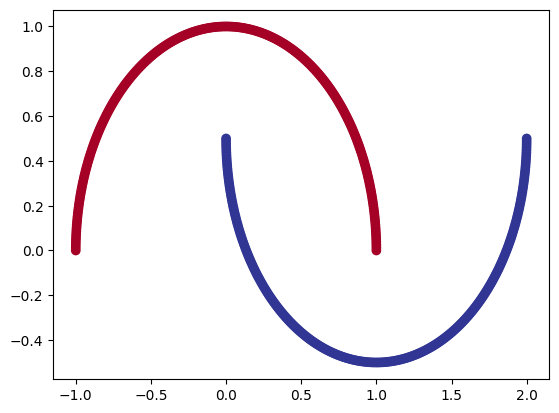

In [50]:
# Visualize with a plot
import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.RdYlBu)

Input shape is 2, and the model has to use non-linear activation. Use binaryentropy.

In [51]:
# Split data set into train data and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [52]:
X_train.shape, X_test.shape

((400, 2), (100, 2))

In [53]:
tf.random.set_seed(42)

model_16 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='softmax')
])

model_16.compile(loss=tf.keras.losses.binary_crossentropy,
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_16 = model_16.fit(X_train, y_train, epochs=100, verbose=0)

In [54]:
model_16.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.1123 - accuracy: 0.5700


[0.11234400421380997, 0.5699999928474426]

<Axes: >

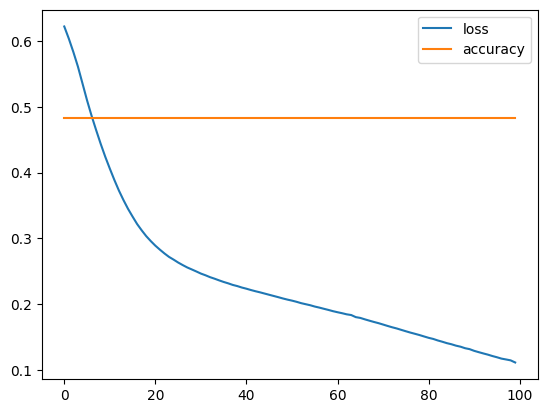

In [55]:
# Plot model_16's loss curves
import pandas as pd
pd.DataFrame(history_16.history).plot()

313/313 [==============================] - 0s 1ms/step
doing binary classification.


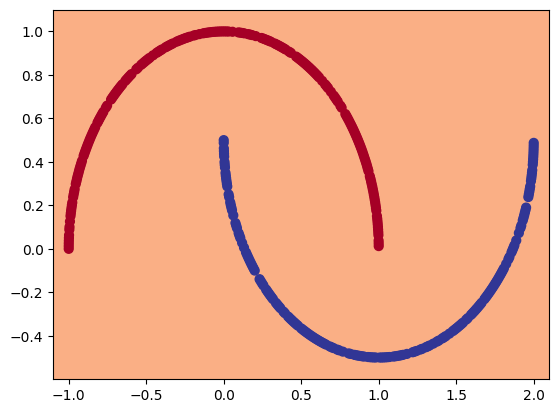

In [56]:
# check decision boundary
plot_decision_boundary(model_16, X_train, y_train)

Let's try add more hidden units

In [57]:
tf.random.set_seed(42)

model_17 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_17.compile(loss=tf.keras.losses.binary_crossentropy,
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_17 = model_17.fit(X_train, y_train, epochs=100, verbose=0)

In [58]:
model_17.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.0043 - accuracy: 1.0000


[0.0042599779553711414, 1.0]

OMG! This time accuracy reaches 100% !? Let's plot decision boundary

313/313 [==============================] - 0s 1ms/step
doing binary classification.


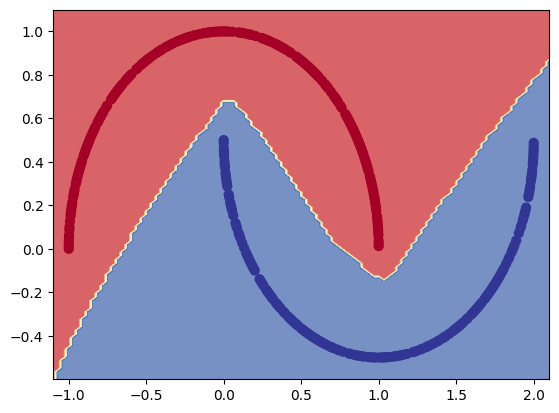

In [59]:
plot_decision_boundary(model_17, X_train, y_train)

### Task 3

Create a function (or write code) to visualize multiple image predictions for the fashion MNIST at the same time. Plot at least three different images and their prediciton labels at the same time.

In [60]:
import matplotlib.pyplot as plt
import random

In [61]:
#
def plot_6_images(model, images, true_labels, classes):
  rand_index = np.random.choice(range(images.shape[0]), 6)
  fig = plt.figure(figsize=(12,12))

  # Add xlabel information (prediction/true label)
  for i,index in zip(range(6), rand_index):
    # Create predictions and targets
    target_image = images[index]
    pred_probs = model.predict(target_image.reshape(1, 28, 28)) # we predict one image at a time
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[index]]

    # Change the color of the titles depending on if the prediction is right or wrong
    if pred_label == true_label:
      color = "green"
    else:
      color = "red"

    # Plot image
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(target_image, cmap=plt.cm.binary)
    # plt.xlabel(classes[true_labels[index]], color=color)
    plt.xlabel("Pred:{} (True:{})".format(pred_label,true_label),color=color)


1/1 [==============================] - 0s 28ms/step


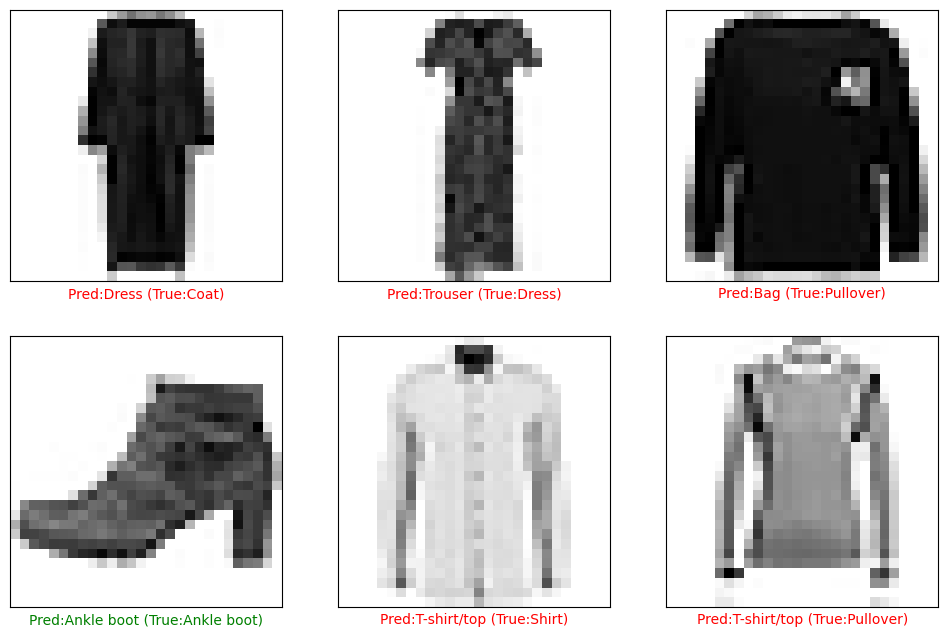

In [86]:
plot_6_images(model_14, test_data_norm, test_labels, class_names)

### Task 4

Train a model to get 88%+ accuracy on the fashion MNIST test set. Plot a confusion matrix to see the results after.

In [91]:
model_12.evaluate(test_data_norm, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.6608 - accuracy: 0.7728


[0.6607961654663086, 0.7728000283241272]

In [87]:
model_14.evaluate(test_data_norm, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 1.2160 - accuracy: 0.5434


[1.2160042524337769, 0.54339998960495]

model_12

**build amodel to find patterns in new data (scaled)**
```
tf.random.set_seed(42)

model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

norm_history = model_12.fit(train_data_norm, train_labels, epochs=10, validation_data=(test_data_norm, test_labels))
```


In [94]:
# Let's try add more hidden units and train longer
tf.random.set_seed(42)

model_18 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_18.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history18 = model_18.fit(train_data_norm, train_labels, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9271 - accuracy: 0.6911
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5614 - accuracy: 0.8028
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4832 - accuracy: 0.8318
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4525 - accuracy: 0.8439
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4339 - accuracy: 0.8498
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4222 - accuracy: 0.8532
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4129 - accuracy: 0.8557
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4058 - accuracy: 0.8579
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3978 - accuracy: 0.8612
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.393

In [95]:
model_18.evaluate(test_data_norm, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.4402 - accuracy: 0.8470


[0.4402279853820801, 0.847000002861023]

<Axes: >

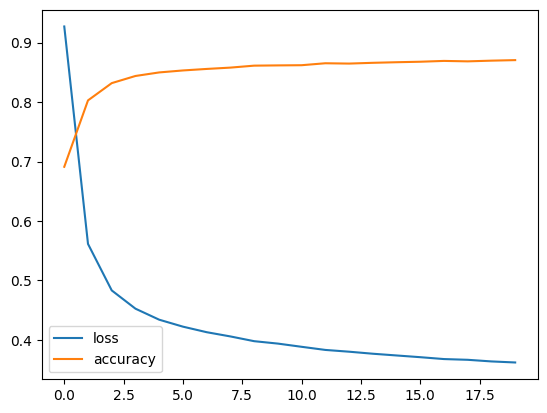

In [98]:
pd.DataFrame(history18.history).plot()

In [103]:
# Let's try add one more layer
tf.random.set_seed(42)

model_19 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_19.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history19 = model_19.fit(train_data_norm, train_labels, epochs=20,
                         validation_data=(test_data_norm, test_labels ))

Epoch 1/20
1875/1875 [==============================] - 6s 2ms/step - loss: 0.9413 - accuracy: 0.6521 - val_loss: 0.5958 - val_accuracy: 0.7898
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5464 - accuracy: 0.8113 - val_loss: 0.5955 - val_accuracy: 0.7910
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5057 - accuracy: 0.8224 - val_loss: 0.5489 - val_accuracy: 0.8055
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4763 - accuracy: 0.8324 - val_loss: 0.5332 - val_accuracy: 0.8171
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4611 - accuracy: 0.8361 - val_loss: 0.5283 - val_accuracy: 0.8164
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4460 - accuracy: 0.8412 - val_loss: 0.4928 - val_accuracy: 0.8247
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4346 - accuracy: 0.8438 - val_loss: 0.4797 - val_accuracy

In [99]:
model_19.evaluate(test_data_norm, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.4939 - accuracy: 0.8287


[0.4938974678516388, 0.8287000060081482]

Even worse!

In [114]:
# Let's try add more hidden units
tf.random.set_seed(42)

model_20 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_20.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history20 = model_20.fit(train_data_norm, train_labels, epochs=20,
                         validation_data=(test_data_norm, test_labels),
                         verbose=0)

<Axes: >

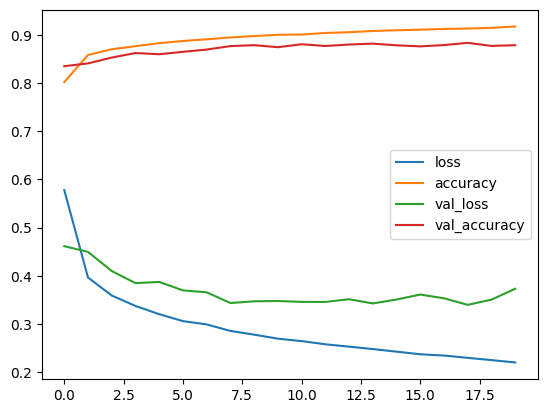

In [115]:
pd.DataFrame(history20.history).plot()

In [116]:
model_20.evaluate(test_data_norm, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3731 - accuracy: 0.8783


[0.3730623722076416, 0.8783000111579895]

In [124]:
# It seems like adding hidden units or layers do not change the result much
# Let's try another optimizer
tf.random.set_seed(42)

model_21 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_21.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.SGD(),
                 metrics=["accuracy"])

history_21 = model_21.fit(train_data_norm, train_labels, epochs=30,
                          validation_data=(test_data_norm, test_labels),
                          verbose=0)


In [125]:
model_21.evaluate(test_data_norm, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3539 - accuracy: 0.8726


[0.35390999913215637, 0.8726000189781189]

<Axes: >

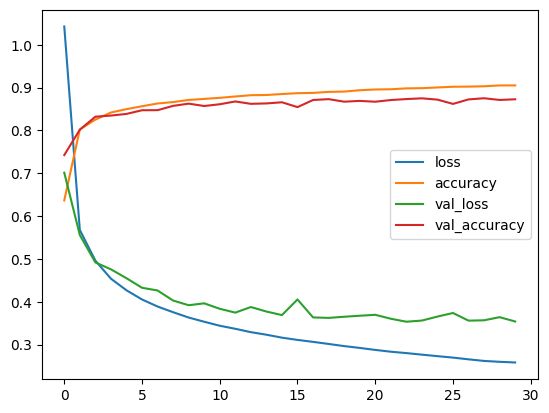

In [126]:
pd.DataFrame(history_21.history).plot()

In [132]:
# It seems like adding hidden units or layers do not change the result much
# Let's try another optimizer
tf.random.set_seed(42)

model_22 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_22.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
                 metrics=["accuracy"])

history_22 = model_22.fit(train_data_norm, train_labels, epochs=20,
                          validation_data=(test_data_norm, test_labels),
                          verbose=0)


In [133]:
model_22.evaluate(test_data_norm, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3611 - accuracy: 0.8703


[0.3611152470111847, 0.8702999949455261]

<Axes: >

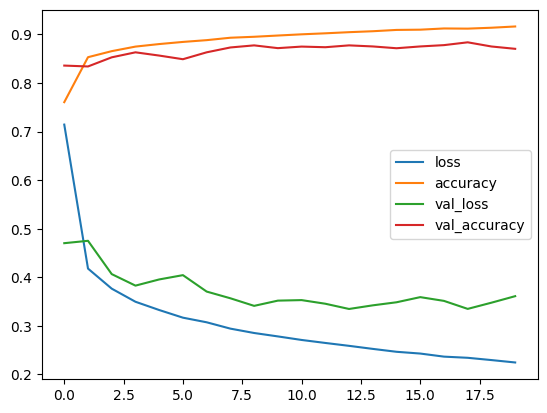

In [134]:
pd.DataFrame(history_22.history).plot()

In [141]:
# Let's try add more hidden units
tf.random.set_seed(42)

model_23 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_23.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history23 = model_23.fit(train_data_norm, train_labels, epochs=20,
                         validation_data=(test_data_norm, test_labels),
                         verbose=0)

In [142]:
model_23.evaluate(test_data_norm, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.1000


[nan, 0.10000000149011612]

<Axes: >

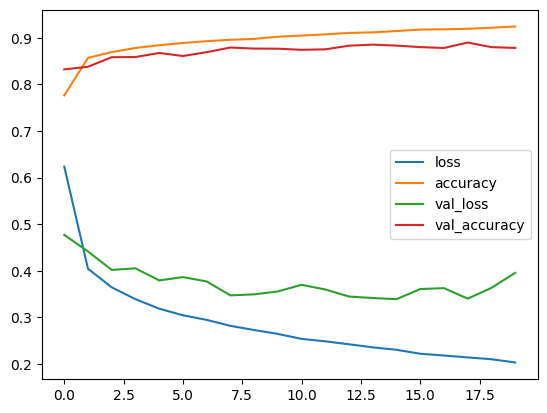

In [140]:
pd.DataFrame(history23.history).plot()

Find a ideal training rate

In [144]:
# Let's find a ideal learning rate
tf.random.set_seed(42)

model_24 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_24.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-4 * 10**(epoch/20)
)

history24 = model_24.fit(train_data_norm, train_labels, epochs=20,
                         validation_data=(test_data_norm, test_labels),
                         callbacks=[lr_scheduler], verbose=0)

<Axes: >

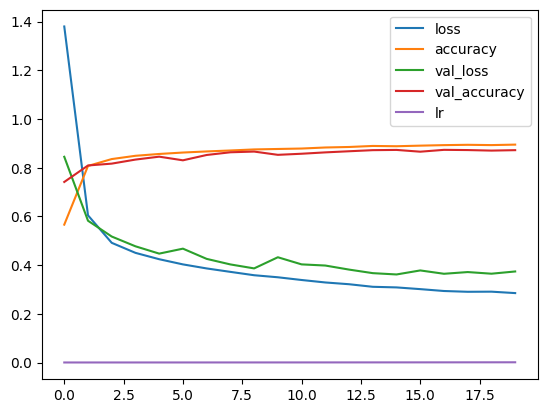

In [147]:
pd.DataFrame(history24.history).plot()


In [148]:
pd.DataFrame(history24.history)

,loss,accuracy,val_loss,val_accuracy,lr
0,1.380235,0.566267,0.844976,0.7416,0.000100
1,0.604454,0.807417,0.582335,0.8093,0.000112
2,0.491569,0.835633,0.517422,0.8169,0.000126
3,0.450361,0.849050,0.477280,0.8335,0.000141
4,0.424249,0.856583,0.447253,0.8455,0.000158
5,0.403002,0.862433,0.467625,0.8305,0.000178
6,0.386378,0.866967,0.425653,0.8524,0.000200
7,0.372293,0.870883,0.402824,0.8635,0.000224
8,0.358470,0.875200,0.386516,0.8664,0.000251
9,0.350075,0.877067,0.432303,0.8530,0.000282


In [152]:
# Let's use lr=0.0002
tf.random.set_seed(42)

model_25 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_25.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002),
                 metrics=['accuracy'])


history25 = model_25.fit(train_data_norm, train_labels, epochs=30,
                         validation_data=(test_data_norm, test_labels),
                        verbose=0)

In [153]:
model_25.evaluate(test_data_norm, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3899 - accuracy: 0.8786


[0.3899202048778534, 0.878600001335144]

<Axes: >

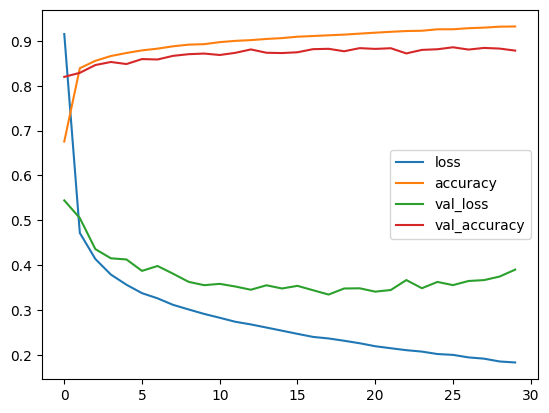

In [154]:
pd.DataFrame(history25.history).plot()


### Task 5

Make a function to show an image of a certain class of the fashion MNIST dataset and make a prediction on it. For example, plot 3 images of the T-shirt class with their predictions.